# Introduction to Time Series Exploratory Data Analysis (EDA)

> Time series data is a unique form of data that involves observations collected at different points in time, often at regular intervals. It appears in various domains such as economics, finance, meteorology, and many others. Analyzing time series data requires specialized techniques due to its temporal nature, where the order and timing of observations hold crucial information.

> Exploratory Data Analysis (EDA) is an essential preliminary step in the analysis of any dataset, and time series data is no exception. Time series EDA involves systematically examining the properties, patterns, and underlying characteristics of a time series dataset to uncover insights and inform subsequent analysis. By visualizing and summarizing the data, analysts can identify trends, seasonality, irregularities, and other features that can influence the choice of forecasting methods and model design.

# The primary goals of time series EDA are:

> 1. <strong>Data Understanding:</strong> Before diving into complex forecasting models, it's vital to gain an intuitive understanding of the data. EDA helps you comprehend the basic structure of the time series, its range, and the overall distribution of values.

> 2. <strong>Trend and Seasonality Identification:</strong> EDA allows you to detect underlying trends and seasonal patterns within the data. These patterns can provide valuable information for selecting appropriate forecasting techniques.

> 3. <strong>Anomaly Detection:</strong> Anomalies, or outliers, can significantly impact forecasting accuracy. EDA helps identify these anomalies, whether they are due to errors in data collection or genuinely significant events.

> 4. <strong>Data Preprocessing:</strong> Effective preprocessing is critical for accurate forecasting. EDA can guide decisions about handling missing values, dealing with outliers, and deciding on appropriate frequency for resampling.

> 5. <strong>Feature Engineering:</strong> EDA might reveal additional features or transformations that could improve forecasting performance. For instance, lagged variables or moving averages might be relevant.

> 6. <strong>Model Selection:</strong> Based on the insights gained from EDA, you can make informed choices about which forecasting methods are most suitable. Some models work better with certain types of patterns, and EDA helps you match the data characteristics with appropriate techniques.

In [1]:
!pip install pandas-datareader 

#What is datareader?
#Q: Up-to-date remote data access for pandas.


In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [8]:
!pip install --upgrade pandas-datareader

In [19]:
import yfinance as yf # <-- Use yfinance
yf.pdr_override() # Method overriding is when a subclass provides a specific implementation for a method that is already defined in its superclass
y_symbols = 'TSLA' #Tesla
startdate = datetime(2017,12,1) #Start 
enddate = datetime(2022,12,15) #End
data = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate) #Set the dcomponents

[*********************100%%**********************]  1 of 1 completed


In [20]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,20.362667,20.688000,20.336666,20.435333,20.435333,64393500
2017-12-04,20.433332,20.551332,20.040667,20.346666,20.346666,87526500
2017-12-05,20.133333,20.533333,20.066668,20.246668,20.246668,69697500
2017-12-06,20.006666,20.892668,20.000000,20.884001,20.884001,107929500
2017-12-07,20.799999,21.242001,20.736668,20.749332,20.749332,71709000
...,...,...,...,...,...,...
2022-12-08,172.199997,175.199997,169.059998,173.440002,173.440002,97624500
2022-12-09,173.839996,182.500000,173.360001,179.050003,179.050003,104872300
2022-12-12,176.100006,177.369995,167.520004,167.820007,167.820007,109794500


<Axes: xlabel='Date'>

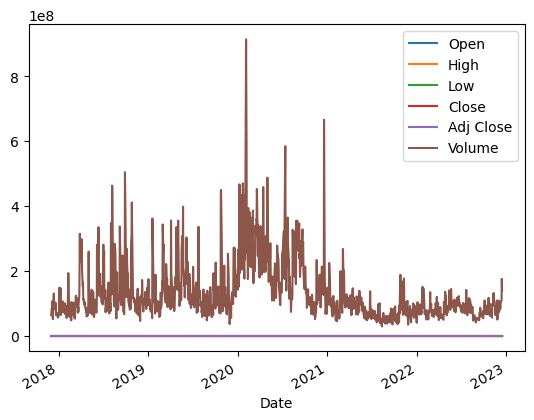

In [21]:
# The Whole Dataset
data.plot()

<Axes: xlabel='Date'>

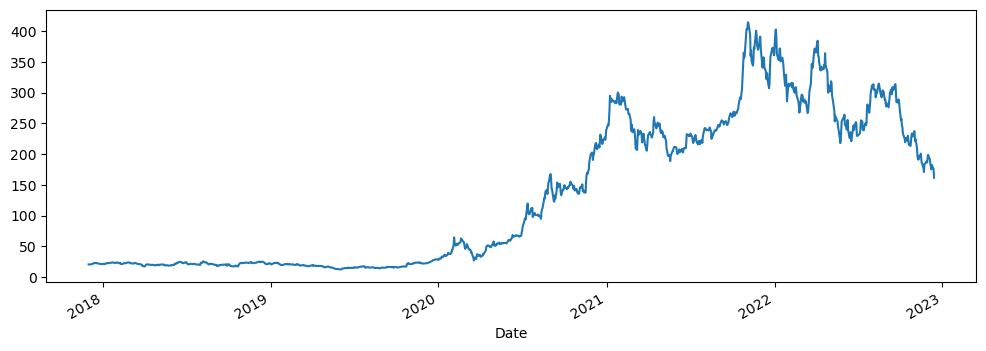

In [24]:
data['High'].plot(figsize =(12,4))

> We can see there is an increase between <strong>2020</strong> and <strong>2021</strong>, let's check it out closely.

<Axes: xlabel='Date'>

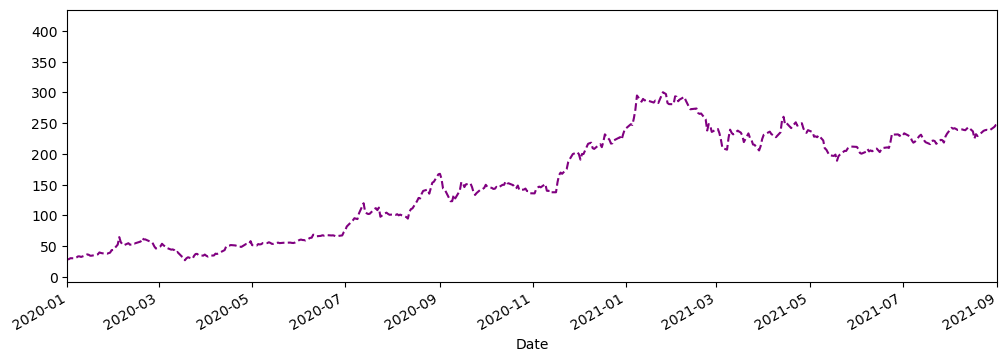

In [28]:
## xlimit and ylimit and coloring
data['High'].plot(xlim=['2020-01-01','2021-09-01'],figsize =(12,4), color='purple', ls='--')

> Between <strong>2021-01</strong> and <strong>2021-03</strong>, there is a peak. 

# Plotting the dates between 2020-01-01 and 2020-01-29

In [34]:
index = data.loc['2020-01-01':'2020-01-29'].index
share_open =  data.loc['2020-01-01':'2020-01-29']['Open']

In [31]:
import matplotlib.pyplot as plt

In [32]:
%matplotlib inline

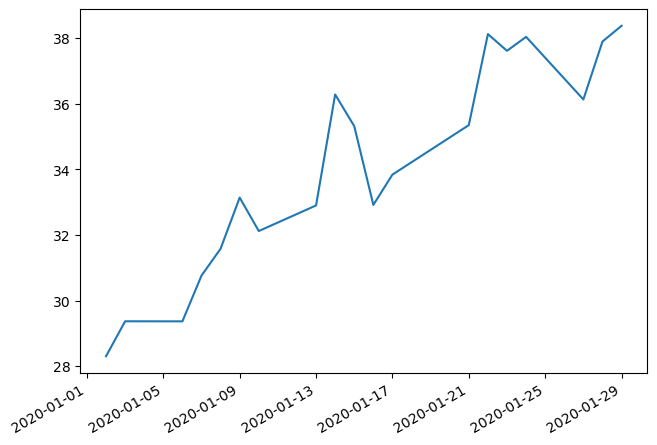

In [38]:
figure,axis = plt.subplots()
# Preventing overlapping
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index,share_open)

> Between <strong>01-21</strong> and <strong>01-25</strong>, we might see the peak.

## Datetime Index

In [40]:
data = data.reset_index()

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1268 non-null   datetime64[ns]
 1   Open       1268 non-null   float64       
 2   High       1268 non-null   float64       
 3   Low        1268 non-null   float64       
 4   Close      1268 non-null   float64       
 5   Adj Close  1268 non-null   float64       
 6   Volume     1268 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.5 KB


In [42]:
# pd.to_datetime(data['Date'])

0      2017-12-01
1      2017-12-04
2      2017-12-05
3      2017-12-06
4      2017-12-07
          ...    
1263   2022-12-08
1264   2022-12-09
1265   2022-12-12
1266   2022-12-13
1267   2022-12-14
Name: Date, Length: 1268, dtype: datetime64[ns]

In [43]:
datetime.now()

datetime.datetime(2023, 8, 22, 17, 53, 57, 53039)

## Time Resampling

In [44]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,20.362667,20.688000,20.336666,20.435333,20.435333,64393500
1,2017-12-04,20.433332,20.551332,20.040667,20.346666,20.346666,87526500
2,2017-12-05,20.133333,20.533333,20.066668,20.246668,20.246668,69697500
3,2017-12-06,20.006666,20.892668,20.000000,20.884001,20.884001,107929500
4,2017-12-07,20.799999,21.242001,20.736668,20.749332,20.749332,71709000


In [47]:
data.set_index('Date', drop=True)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,20.362667,20.688000,20.336666,20.435333,20.435333,64393500
2017-12-04,20.433332,20.551332,20.040667,20.346666,20.346666,87526500
2017-12-05,20.133333,20.533333,20.066668,20.246668,20.246668,69697500
2017-12-06,20.006666,20.892668,20.000000,20.884001,20.884001,107929500
2017-12-07,20.799999,21.242001,20.736668,20.749332,20.749332,71709000
...,...,...,...,...,...,...
2022-12-08,172.199997,175.199997,169.059998,173.440002,173.440002,97624500
2022-12-09,173.839996,182.500000,173.360001,179.050003,179.050003,104872300
2022-12-12,176.100006,177.369995,167.520004,167.820007,167.820007,109794500


In [53]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date') 

In [55]:
data.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,20.006666,20.533333,20.000000,20.246668,20.246668,52027500
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500
2019-12-31,12.073333,12.445333,11.799333,11.931333,11.931333,36984000
2020-12-31,24.980000,26.990667,23.367332,24.081333,24.081333,52073100
2021-12-31,184.183334,188.736664,179.830002,187.666672,187.666672,29401800
2022-12-31,159.250000,161.619995,155.309998,156.800003,156.800003,41864700


In [56]:
# Year end 
data.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,22.993334,23.162666,22.505333,22.896667,22.896667,130998000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500
2019-12-31,29.000000,29.020666,28.423332,28.729334,28.729334,450091500
2020-12-31,233.330002,239.573334,230.373337,235.223328,235.223328,914082000
2021-12-31,411.470001,414.496674,405.666656,409.970001,409.970001,268189500
2022-12-31,396.516663,402.666656,378.679993,399.926666,399.926666,175862700


<Axes: xlabel='Date'>

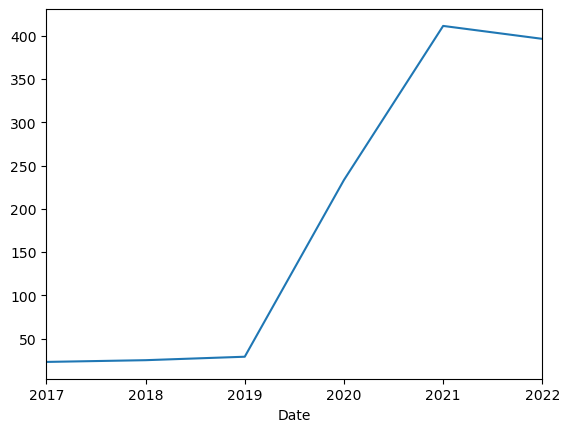

In [57]:
data.resample(rule='A').max()['Open'].plot()

<Axes: xlabel='Date'>

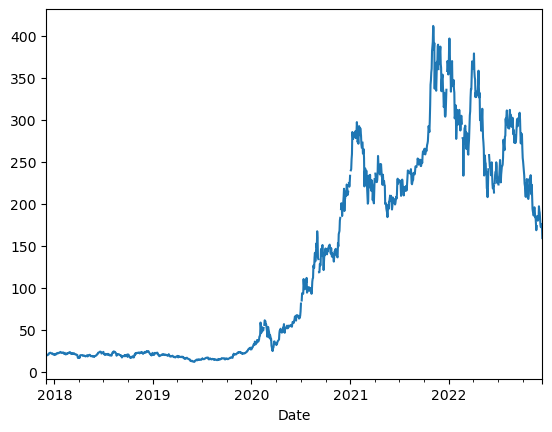

In [58]:
# B: Business Day
data.resample(rule='B').max()['Open'].plot()

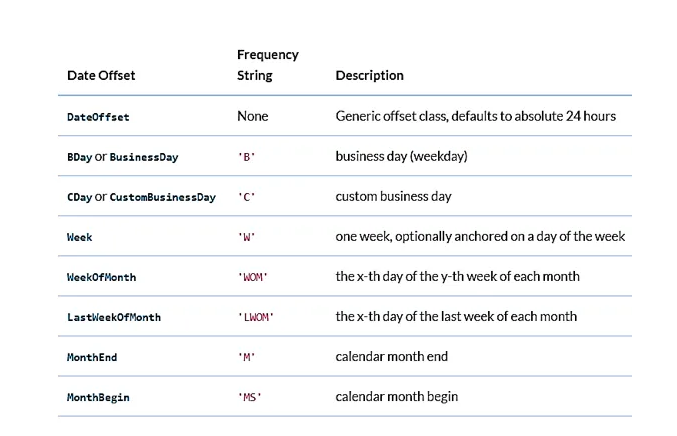

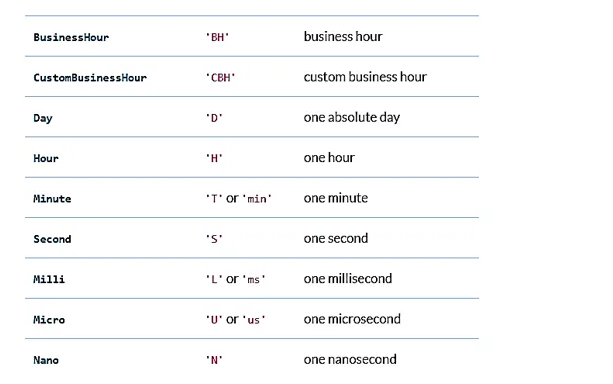

> To get more information: https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78#:~:text=Resampling%20is%20used%20in%20time,DatetimeIndex%2C%20PeriodIndex%2C%20or%20TimedeltaIndex.

<Axes: xlabel='Date'>

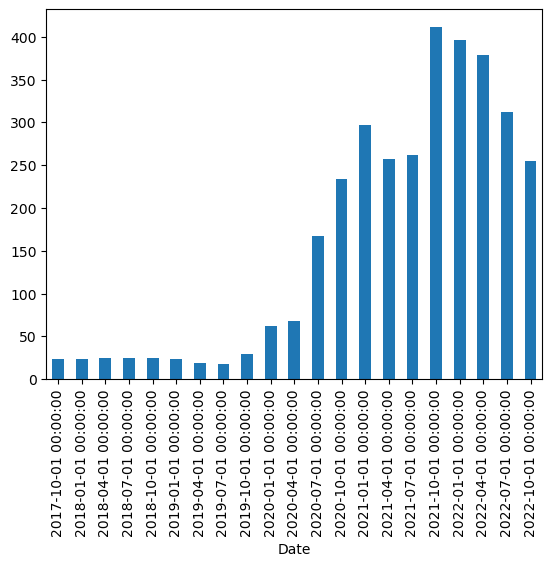

In [60]:
# QS: Quaterly start frequency
data.resample(rule='QS').max()['Open'].plot(kind='bar')

## Rolling

<Axes: xlabel='Date'>

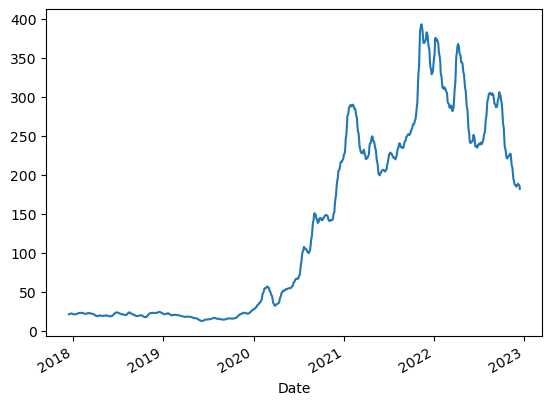

In [64]:
data['High'].rolling(10).mean().plot()

> So, In this mini-project, we've learned how to make EDA for Time Series with the help of Krish Naik. 

> Don't Forget: 

> Time Series Exploratory Data Analysis (EDA) is crucial for understanding the patterns, trends, and underlying characteristics within time-dependent data. Whether it's financial data, weather patterns, stock prices, or any other sequential data, performing EDA on time series data offers several benefits:

> <strong> Pattern Recognition: </strong> EDA helps in identifying recurring patterns, trends, and seasonality in the data. These insights can lead to better predictions and informed decision-making.

> <strong> Anomaly Detection:</strong> Time series EDA can uncover unusual spikes or drops in the data that might indicate anomalies or outliers. Detecting anomalies is important for detecting fraud, errors, or other significant events.

> <strong> Forecasting Improvement:</strong> By analyzing historical patterns, you can improve the accuracy of forecasting models. EDA provides insights into potential predictors and relationships between variables.

> <strong> Feature Engineering: </strong>EDA aids in selecting relevant features and understanding their relationships in the context of time. This is crucial for building effective predictive models.

> <strong> Data Quality Check:</strong> EDA helps identify missing data, irregularities, and gaps in the time series. Addressing data quality issues ensures the reliability of subsequent analyses.

> <strong> Model Validation:</strong> Exploring the data visually and statistically can validate the assumptions made for modeling, leading to more robust and accurate predictions.

> Project End-text:

> In conclusion, performing Exploratory Data Analysis (EDA) on time series data is a pivotal step in gaining insights that can drive meaningful decisions and predictive accuracy. By uncovering patterns, detecting anomalies, and understanding the underlying dynamics, EDA lays the foundation for successful forecasting and predictive modeling. In a world increasingly reliant on data-driven insights, mastering the art of time series EDA empowers businesses and researchers to harness the power of historical data to make informed choices for the future.
